In [1]:
N = 30 # 카테고리 trial를 30회 시행
theta = [0, 0, 0.1, 0.2, 0.3, 0.4] # unfair한 확률

In [2]:
rv = sp.stats.multinomial(N, theta) # 다항분포 생성

In [5]:
X = rv.rvs(100, random_state=0) # 30회 반복시행한 카테고리 trial를 100번 반복
X[:3] # 그래서 행의 합은 30
# 첫행의 의미는 주사위를 30번 던져서 3이 3번나오고, 4가 6번, 5가 9번, 6이 12번 나왔다는 말

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13]])

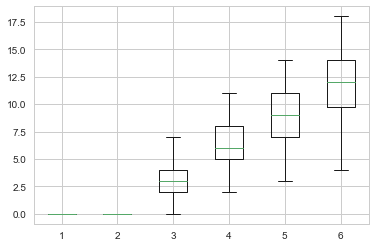

In [6]:
plt.boxplot(X)
plt.show() # 가운데 초록색 선이 median

In [20]:
df = pd.DataFrame(X, columns=np.arange(1,7)).stack().reset_index()
df.columns = ["trial", "class", "binomial"] # [100회 반복, 주사위 각 눈, 나온 횟수]
df[:6]
# index 5번까지 보면 0번째 시행(사실 첫 번째)에서 
# 주사위를 30번 던져서 3이 3번나오고, 4가 6번, 5가 9번, 6이 12번 나왔다는 말

,trial,class,binomial
0,0,1,0
1,0,2,0
2,0,3,3
3,0,4,6
4,0,5,9
5,0,6,12


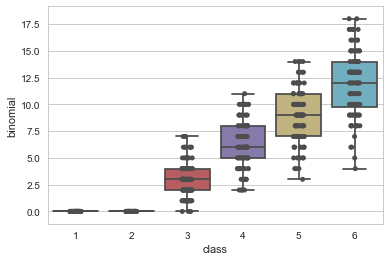

In [21]:
# 이 시행을 통해 주사위의 각 눈이 몇번 나왔다고 
#콕 집어 말할 수 없기에...boxplot으로 표현
# jitter는 겹쳐진 점을 흔들어서 넓게 퍼뜨림(그래서 그위치가 몇번 나왔는지 보여줌.)
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class",y="binomial",data=df, jitter=True, color=".3")
plt.show()

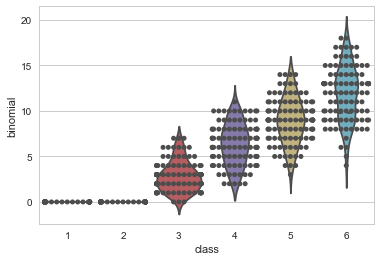

In [22]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.show()